In [26]:
!pip install keras==2.2.4

  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [191]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle
from keras import regularizers


from time import time
from mpl_toolkits.mplot3d import Axes3D

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


import mediapipe as mp

from tensorflow.keras.layers import experimental


from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy


In [185]:
train_dir = "Datasets/CV/train/" #passing the path with training images
test_dir = "Datasets/CV/test/"   #passing the path with testing images

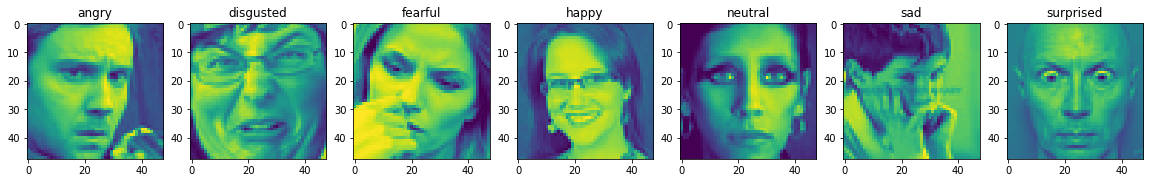

In [29]:
import matplotlib.pyplot as plt

target_var = os.listdir(train_dir)


fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

In [92]:
img_height = 224
img_width = 224
batch_size = 100

training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

testing_set =  tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

train_data = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training') # set as training data

validation_generator = train_data.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation') # set as validation data


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [76]:
classes = train_gen.class_indices

In [77]:
classes

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [107]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode = "grayscale",
        shuffle=True,
        class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode = "grayscale",
        shuffle=True,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [108]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_33 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_34 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)       

In [111]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('./Emotion_recogion_CV.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

opt = tf.keras.optimizers.Adam(lr=0.0005,decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [113]:
history = model.fit_generator(train_generator, epochs=50, validation_data=validation_generator,callbacks=callbacks)

Epoch 1/50
449/449 [==============================] - 20s 44ms/step - loss: 1.1663 - accuracy: 0.5697 - val_loss: 0.9728 - val_accuracy: 0.6364

Epoch 00001: val_loss improved from 0.98319 to 0.97283, saving model to .\Emotion_recogion_CV.h5
Epoch 2/50
449/449 [==============================] - 20s 45ms/step - loss: 1.1525 - accuracy: 0.5736 - val_loss: 0.9735 - val_accuracy: 0.6361

Epoch 00002: val_loss did not improve from 0.97283
Epoch 3/50
449/449 [==============================] - 20s 44ms/step - loss: 1.1523 - accuracy: 0.5748 - val_loss: 0.9724 - val_accuracy: 0.6386

Epoch 00003: val_loss improved from 0.97283 to 0.97240, saving model to .\Emotion_recogion_CV.h5
Epoch 4/50
449/449 [==============================] - 20s 43ms/step - loss: 1.1488 - accuracy: 0.5801 - val_loss: 0.9615 - val_accuracy: 0.6422

Epoch 00004: val_loss improved from 0.97240 to 0.96153, saving model to .\Emotion_recogion_CV.h5
Epoch 5/50
449/449 [==============================] - 20s 43ms/step - loss: 1.

In [117]:
model.evaluate_generator(train_generator)

C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.0100797414779663, 0.6205719709396362]

In [118]:
model.evaluate_generator(validation_generator)

[0.951217532157898, 0.6485093235969543]

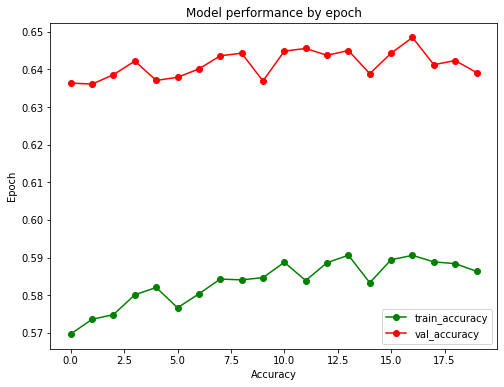

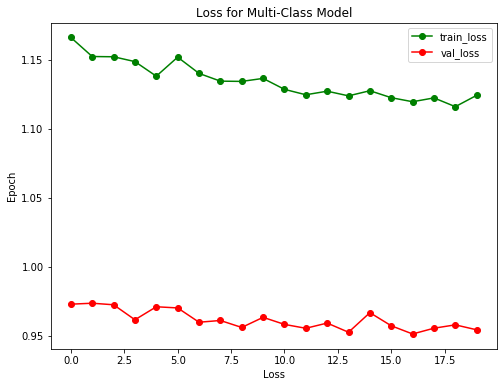

In [135]:
plt.figure(figsize=(8,6))
plt.title('Model performance by epoch')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss for Multi-Class Model')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()

In [177]:
img_path = train_dir + 'happy/im0.png'

In [146]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x00000123C93A2988>>

In [192]:
# load model
from keras.models import  load_model
model = load_model("Emotion_recogion_CV.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

AttributeError: 'numpy.ndarray' object has no attribute 'img_to_array'

In [193]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [194]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [199]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections

In [200]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
                             

In [209]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        
        # Extract landmarks
        try:
            landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
            print(landmarks)          
        except:
            pass
        
        
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[ 0.5256741   0.74502051 -3.23420453  0.56294399  0.65028739 -3.21390915
  0.58555245  0.64891744 -3.21371698  0.60886955  0.64849091 -3.21412802
  0.48627767  0.64781225 -3.21935511  0.4593761   0.64464343 -3.21893692
  0.4371469   0.6424123  -3.21878123  0.65564322  0.66038692 -2.66381955
  0.40055746  0.65071511 -2.66287947  0.56080258  0.82140595 -2.98907065
  0.48078561  0.82066798 -2.99106932  0.81581414  0.93041068 -1.96806467
  0.23668377  0.94017321 -1.89982378  0.93074894  1.34156692 -1.52728176
  0.15794578  1.4161756  -1.44721878  0.92127973  1.72445297 -1.4514668
  0.18239707  1.73769832 -1.63904834  0.945656    1.82616043 -1.50899303
  0.16481394  1.84693885 -1.72342908  0.91069949  1.83030725 -1.58724976
  0.19460097  1.81520832 -1.8404026   0.8850522   1.7959621  -1.47994852
  0.21795385  1.77258933 -1.69255769  0.70539767  1.57549226 -0.07222092
  0.34087864  1.58192432  0.07807411  0.67489398  2.26189113  0.11806728
  0.38882872  2.25575686  0.14547724  0.67157674  2.

[ 0.49507508  0.66733283 -3.04504681  0.53472364  0.58461446 -3.00491667
  0.55732     0.58613759 -3.0045383   0.57670808  0.58861327 -3.00470996
  0.45729408  0.58445364 -3.01354647  0.43331224  0.5874567  -3.01328182
  0.41367856  0.59236491 -3.01341772  0.61377376  0.61338806 -2.43590426
  0.37394994  0.61916608 -2.46042919  0.541875    0.74703747 -2.8029542
  0.4470323   0.74443376 -2.81368017  0.77024788  0.90306002 -1.79336226
  0.21883877  0.91778845 -1.72394824  0.96994936  1.24055827 -1.40621853
  0.11693931  1.36778772 -1.30922747  0.99459302  1.64105833 -1.37412465
  0.12932283  1.74432302 -1.53026342  1.02523077  1.75139868 -1.41401362
  0.11757997  1.87807584 -1.60975838  0.97674501  1.75862253 -1.50009644
  0.15054579  1.85630357 -1.70995975  0.9521634   1.71941805 -1.40380442
  0.16775844  1.8029983  -1.5761019   0.68033296  1.62499928 -0.08804987
  0.33863232  1.65344286  0.09379245  0.67870313  2.30850744 -0.35731983
  0.37757978  2.29412389 -0.35299912  0.70438069  2.

[ 0.4831199   0.6396898  -2.35629988  0.52097005  0.56377983 -2.32217789
  0.54460198  0.56422347 -2.3218236   0.56462175  0.56668407 -2.32176161
  0.44570726  0.5640679  -2.3330965   0.4242993   0.56467688 -2.33235359
  0.40664285  0.56696403 -2.3324368   0.60093486  0.59692842 -1.79042661
  0.36986485  0.59114033 -1.81477737  0.53097087  0.71704829 -2.12720871
  0.43876925  0.71419114 -2.13839531  0.76802218  0.89758247 -1.17173064
  0.21636517  0.91964412 -1.26069653  0.97438556  1.25981557 -0.87408018
  0.11710839  1.38336945 -0.93104219  0.97662193  1.67521632 -1.0818001
  0.12481537  1.76377559 -1.27554822  1.01657557  1.80092466 -1.14034998
  0.09904806  1.90054429 -1.37037194  0.95389569  1.81529427 -1.21605468
  0.1477613   1.88480783 -1.47199297  0.92297781  1.76899266 -1.11681104
  0.16982868  1.82928455 -1.32369256  0.70547199  1.67059684 -0.07668167
  0.32427487  1.6974088   0.08387277  0.70210117  2.34566712 -0.16684785
  0.37778538  2.3483727   0.02942402  0.72752792  2.

  3.59676689e-01  3.31417346e+00  6.47094399e-02]
[ 4.86082733e-01  6.96106911e-01 -2.86661172e+00  5.23952246e-01
  6.09443426e-01 -2.83837962e+00  5.46711624e-01  6.06267810e-01
 -2.83848977e+00  5.66112041e-01  6.04265869e-01 -2.83928537e+00
  4.44083124e-01  6.16503060e-01 -2.84353876e+00  4.19362545e-01
  6.17231250e-01 -2.84375525e+00  3.99886668e-01  6.17168546e-01
 -2.84440923e+00  6.04778707e-01  6.10771716e-01 -2.27190328e+00
  3.68899733e-01  6.14865899e-01 -2.27632952e+00  5.32747865e-01
  7.62581170e-01 -2.61563993e+00  4.41171467e-01  7.68995941e-01
 -2.61891174e+00  7.83935428e-01  9.03545082e-01 -1.63135052e+00
  2.15233609e-01  9.02435482e-01 -1.57639718e+00  1.02695763e+00
  1.24620259e+00 -1.52173924e+00  7.57553056e-03  1.33064020e+00
 -1.29082918e+00  1.07045329e+00  1.68034708e+00 -1.84761488e+00
  1.28242467e-02  1.74608433e+00 -1.61386514e+00  1.11100936e+00
  1.82469773e+00 -1.95481610e+00  8.50930810e-05  1.89167762e+00
 -1.72449148e+00  1.05767286e+00  1.8286

[ 0.48047858  0.71683544 -3.30183983  0.51789069  0.62949151 -3.28320646
  0.54127455  0.6269868  -3.28336143  0.56135041  0.62569207 -3.28439212
  0.43940097  0.63651109 -3.27672505  0.41468495  0.63839966 -3.27705836
  0.39437178  0.64003199 -3.27756357  0.60300446  0.62310308 -2.65901804
  0.36327055  0.63060796 -2.61263132  0.52780426  0.7849732  -3.02026939
  0.43777037  0.78977889 -3.00941968  0.79128373  0.91658437 -1.9365387
  0.20943658  0.8981871  -1.74038672  0.97906286  1.31961668 -1.91362357
  0.00696727  1.3293376  -1.51213312  0.97440881  1.67317581 -2.37417293
  0.03931635  1.64186811 -2.03049517  1.00289702  1.79667938 -2.52867556
  0.03954913  1.7641921  -2.17254186  0.95517635  1.77163482 -2.61919451
  0.07027374  1.72006083 -2.26805568  0.93168002  1.72873628 -2.4230895
  0.0812742   1.67897487 -2.0840013   0.67014688  1.77257001 -0.11800557
  0.28793749  1.76453614  0.12418511  0.65926564  2.52037024 -0.10892995
  0.3238253   2.46200871  0.03086893  0.65741956  3.1

  0.36833978  3.38997579 -0.49284974]
[ 0.47339267  0.66340369 -2.37731647  0.51195824  0.59135014 -2.33016634
  0.53513622  0.59349757 -2.33054972  0.55444854  0.5966264  -2.33099246
  0.44005886  0.58676499 -2.33507752  0.41707224  0.58633268 -2.33502007
  0.39691585  0.58730847 -2.33573651  0.5902909   0.61461437 -1.72468567
  0.36784261  0.60050339 -1.7329638   0.51782334  0.73676944 -2.12012529
  0.43004245  0.73020583 -2.12434125  0.77535319  0.91450673 -1.13618588
  0.20766994  0.89869058 -1.07537544  0.95935094  1.31458282 -1.07448888
  0.0566367   1.33221114 -0.85076696  0.94734347  1.64103496 -1.64622283
  0.10698098  1.65265918 -1.48159552  0.97005302  1.7729547  -1.81359696
  0.11183213  1.78613496 -1.65345156  0.92069894  1.7507242  -1.92726743
  0.14677827  1.74617267 -1.76398969  0.90070945  1.70118463 -1.71286619
  0.156091    1.69826472 -1.54575706  0.65468532  1.7994827  -0.10992
  0.28513137  1.78478539  0.11622143  0.648251    2.54670572 -0.24919006
  0.31764558  2.

[ 0.47484794  0.66676295 -2.35164475  0.51173913  0.58693874 -2.31214404
  0.53400183  0.58616728 -2.31243563  0.55283874  0.58687603 -2.31275582
  0.44309002  0.59069079 -2.3157506   0.42065915  0.59221512 -2.31543875
  0.40018201  0.59419924 -2.31616712  0.58741838  0.60042393 -1.71795273
  0.37313765  0.59751928 -1.71346974  0.51811039  0.73256952 -2.09475589
  0.4365097   0.73231578 -2.09540343  0.78007483  0.90878564 -1.10406804
  0.21237163  0.89505649 -1.08035386  0.9595871   1.30013204 -1.01391721
  0.04478148  1.34114814 -0.84050292  0.95100099  1.66068292 -1.59502864
  0.08022399  1.69774628 -1.42875576  0.97725642  1.79495323 -1.76677918
  0.07591176  1.84121323 -1.61185479  0.92808771  1.77304792 -1.88230288
  0.12109208  1.80403113 -1.73991323  0.90553772  1.72616494 -1.66521609
  0.13436419  1.75447702 -1.50036168  0.66826856  1.79607558 -0.08910428
  0.2966077   1.78813767  0.09562645  0.67303932  2.54657865 -0.18444853
  0.33278498  2.49424529 -0.21582083  0.6739316   3

[ 0.48011622  0.68381524 -2.69742846  0.51679677  0.60592169 -2.66182089
  0.53743744  0.60639322 -2.66214085  0.55621123  0.60777581 -2.66271591
  0.4485406   0.60519612 -2.65873194  0.42464513  0.60550505 -2.65878344
  0.40280676  0.60666394 -2.6594727   0.59113163  0.61590809 -2.05176234
  0.37116262  0.60781598 -2.02748632  0.52008474  0.75311083 -2.42923713
  0.43862191  0.75286043 -2.42347288  0.77908075  0.91153091 -1.40806496
  0.20799932  0.89925879 -1.31072044  0.96422625  1.29711425 -1.43638539
  0.04778701  1.34551919 -1.14163029  0.95771295  1.62650192 -1.97931361
  0.10187181  1.64577305 -1.82559967  0.98304224  1.75131786 -2.12392378
  0.1099504   1.77510846 -2.00692916  0.93612128  1.71705866 -2.20803094
  0.14593485  1.71789527 -2.10874367  0.91430062  1.67257261 -2.02586722
  0.15370196  1.67056489 -1.88547742  0.6657595   1.80402601 -0.10112929
  0.28995365  1.79386365  0.10722701  0.66693938  2.54883909 -0.15084538
  0.32605949  2.4968164  -0.12005749  0.66471303  3

In [207]:
len(results.face_landmarks.landmark)

468

In [246]:
classes = ['class']
for val in range(1, 468+1):
    classes += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [247]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(classes)

In [255]:
class_name = 'neutral'
CSV_FILE = 'coords.csv'
sequence_length = 200 # length of recording

In [256]:
seq_len = sequence_length 

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        
        # Extract landmarks
        try:
            landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
            landmarks = np.append(class_name,landmarks)
            
            #Export to CSV
            with open(CSV_FILE, mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(landmarks)
            
        except:
            pass
        
        cv2.putText(image, 'Collecting frames for {}, Timer {}'.format(class_name, seq_len), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        seq_len = seq_len - 1

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        if seq_len < 1:
            break
            
    cap.release()
    cv2.destroyAllWindows()